In [1]:
#Import Packages


import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split

import re
import string

import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [2]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\kryzw\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kryzw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:


def process_tweet(tweet):
  stemmer = PorterStemmer() 
  stopwords_english = stopwords.words('english')

  # remove the stock market tickers
  tweet = re.sub(r'\$\w*', '', tweet)

  # remove the old styles retweet text 'RT'
  tweet = re.sub(r'^RT[\s]+', '', tweet)

  # remove the hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

  # remove the # symbol
  tweet = re.sub(r'#', '', tweet)

  # Tokenize the tweet
  tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweet_clean = []

  # removing stopwords and punctuation
  for word in tweet_tokens:
    if (word not in stopwords_english and
        word not in string.punctuation):
      stem_word = stemmer.stem(word)    #stemming
      tweet_clean.append(stem_word)

  return tweet_clean

In [4]:
# https://medium.com/@koshut.takatsuji/twitter-sentiment-analysis-with-full-code-and-explanation-naive-bayes-a380b38f036b
#cleaning data

#Import labelled training data set
df = pd.read_csv('C:/Dev_And_Apps/Twitter_Extract_app/TrainingData/TRAINING3.csv')

#chane pandas options to show full column width
pd.options.display.max_colwidth = 250
#read head of data
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2022 non-null   object
 1   Target  2022 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.7+ KB


<AxesSubplot:title={'center':'Distribution of Tweet Sentiment in Labelled Data'}, xlabel='Sentiment', ylabel='# Tweets'>

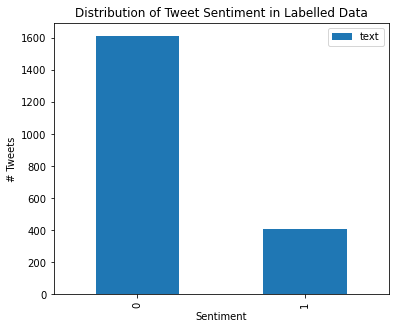

In [5]:
# general analysis of dataset
#DISTRIBUTION OF SENTIMENT
dfg = df.groupby(df['Target']).count()
dfg.plot(kind='bar', title='Distribution of Tweet Sentiment in Labelled Data', ylabel='# Tweets',
         xlabel='Sentiment', figsize=(6, 5))

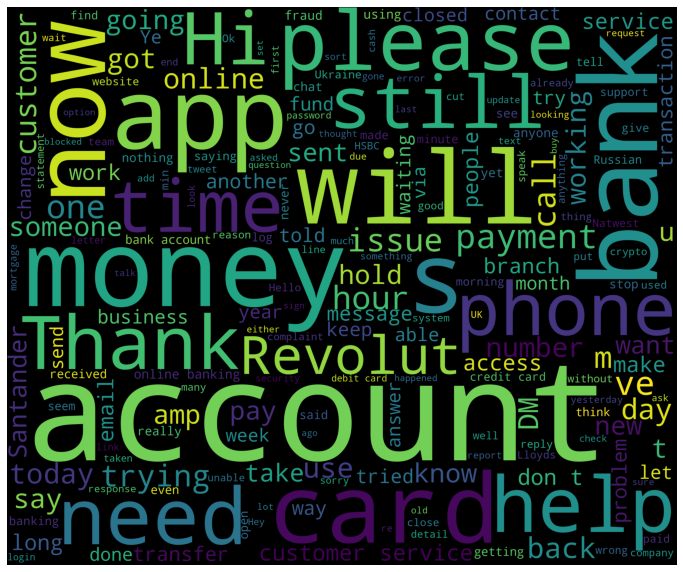

In [10]:
#Word cloud for negatiuve tweets
from wordcloud import WordCloud,STOPWORDS

dfn=df[df['Target']==0]
words = ' '.join(dfn['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

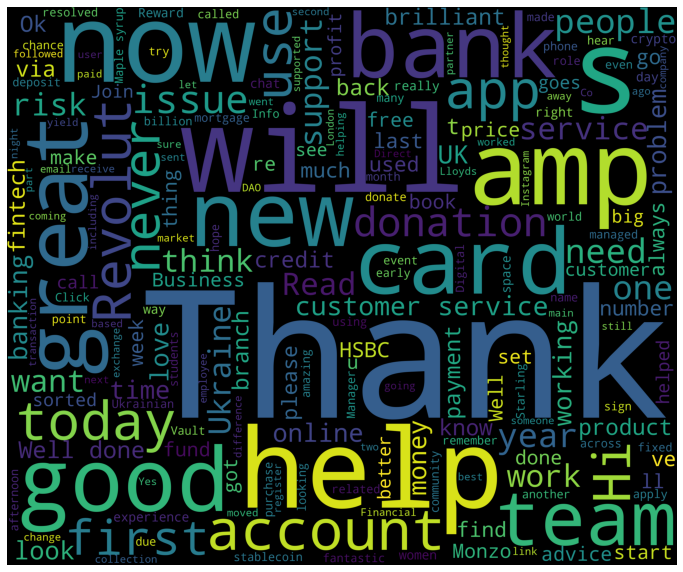

In [11]:
#Word cloud for positive tweets
from wordcloud import WordCloud,STOPWORDS

dfp=df[df['Target']==1]
words = ' '.join(dfp['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
#General data cleaning

#Remove any rows with a "nan" in them
df = df.dropna(axis=0, how = 'any')

#Make it so that any non readable text gets converted into nothing
def removetext(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])

#Here I am doing the actual removing
df['text'] = df['text'].apply(removetext)

In [13]:
#encoding the sentiment and label
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['sent_code']=le.fit_transform(df['Target'])
#df['lab_code']=le.fit_transform(df['label'])
df.head(5)

,text,Target,sent_code
0,"To all @RevolutApp users, grab your $SHIB now before we go to the moon. Last chance https://t.co/NH5ovmWYrM",1,1
1,@GossipShib @RevolutApp @RobinhoodApp ShibArmy Never Sleeps LFG https://t.co/mBZCqtlm9w,1,1
2,@monzo I think Im a bit late to the party https://t.co/Lm6IpxKAnb,0,0
3,@GossipShib @RevolutApp Now i can add to my bag so easyyttt @RevolutApp https://t.co/lvTuKdShag,1,1
4,@HSBC_UK This is totally unbelievable two hours forty mins then cut off I need help this so stressful for something thats important. HSBC you have failed pull your finger out!!!! How do I get help from my Bank https://t.co/lJH00WOCQR,0,0


In [14]:
#remove stop words
import re
import nltk
from nltk.corpus import stopwords

def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

#remove @monzo etc
def clean_tweet_handles(raw_tweet):
    handles_only = re.sub(r"()@\w+",r"\1",raw_tweet)
    #print(handles_only)
    words = handles_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

df['no_handles']=df['text'].apply(lambda x: clean_tweet_handles(x))
df['clean_tweet']=df['no_handles'].apply(lambda x: tweet_to_words(x))
df['Tweet_length']=df['text'].apply(lambda x: clean_tweet_length(x))



df.head()

,text,Target,sent_code,no_handles,clean_tweet,Tweet_length
0,"To all @RevolutApp users, grab your $SHIB now before we go to the moon. Last chance https://t.co/NH5ovmWYrM",1,1,"users, grab $shib go moon. last chance https://t.co/nh5ovmwyrm",users grab shib go moon last chance https co nh ovmwyrm,12
1,@GossipShib @RevolutApp @RobinhoodApp ShibArmy Never Sleeps LFG https://t.co/mBZCqtlm9w,1,1,shibarmy never sleeps lfg https://t.co/mbzcqtlm9w,shibarmy never sleeps lfg https co mbzcqtlm w,11
2,@monzo I think Im a bit late to the party https://t.co/Lm6IpxKAnb,0,0,think im bit late party https://t.co/lm6ipxkanb,think im bit late party https co lm ipxkanb,10
3,@GossipShib @RevolutApp Now i can add to my bag so easyyttt @RevolutApp https://t.co/lvTuKdShag,1,1,add bag easyyttt https://t.co/lvtukdshag,add bag easyyttt https co lvtukdshag,9
4,@HSBC_UK This is totally unbelievable two hours forty mins then cut off I need help this so stressful for something thats important. HSBC you have failed pull your finger out!!!! How do I get help from my Bank https://t.co/lJH00WOCQR,0,0,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank https://t.co/ljh00wocqr,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank https co ljh wocqr,26


In [15]:
train,test = train_test_split(df,test_size=0.3,random_state=42)
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)
    
test_clean_tweet[0:10]

['walk bank business customer find cant get change business go local instead whats point banking might well open account',
 'yes could middle name added never card changed type asks name card payments',
 'example link email doesnt work id proof https co ps qoipdnh',
 'home insurance contact number cuts every time try call problem',
 'founded gazprom money owned russian state means russian state shares etc revolut',
 'able',
 'santander operate online one answers phone',
 'nope neither load',
 'someone paid bank th feb looking',
 'another copy paste reply ill canceling credits account using high street bank seems constant problems']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [18]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=400),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=500),
    AdaBoostClassifier(),
    GaussianNB()]

Accuracy of LogisticRegressionis 0.7874794069192751
Accuracy of KNeighborsClassifieris 0.8056013179571664
Accuracy of SVCis 0.7874794069192751
Accuracy of DecisionTreeClassifieris 0.8253706754530478
Accuracy of RandomForestClassifieris 0.85667215815486
Accuracy of AdaBoostClassifieris 0.8237232289950577
Accuracy of GaussianNBis 0.7742998352553542


Text(0.5, 1.0, 'Accuracies of Models')

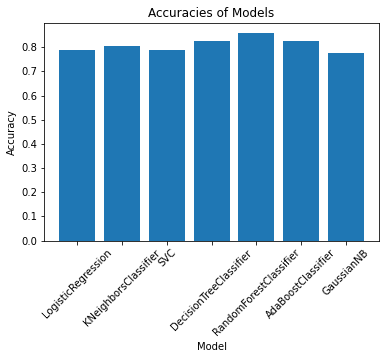

In [19]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sent_code'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sent_code'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sent_code'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    
    
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [20]:
#Fit the best model to data frame

dense_features=train_features.toarray()
dense_test= test_features.toarray()
clf = RandomForestClassifier()
fit = clf.fit(train_features,train['sent_code'])
pred = fit.predict(test_features)
accuracy = accuracy_score(pred,test['sent_code'])
print(accuracy)

test['pred_sent'] = pred
test.head(4)

0.85667215815486


C:\Users\kryzw\AppData\Local\Temp/ipykernel_17784/574824970.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_sent'] = pred


,text,Target,sent_code,no_handles,clean_tweet,Tweet_length,pred_sent
674,"@HSBC_UK when you walk into your bank as a business customer and find out you cant get change for your business you have to go to the local @PostOffice instead, whats the point in banking with you I might as well just open up a @PostOffice account!",0,0,"walk bank business customer find cant get change business go local instead, whats point banking might well open account!",walk bank business customer find cant get change business go local instead whats point banking might well open account,23,0
1384,@santanderukhelp Yes that could be it as my middle name has been added I've never had that on a card can this be changed at all? What to I type in when it asks for name on a card for payments,1,1,yes could middle name added i've never card changed all? type asks name card payments,yes could middle name added never card changed type asks name card payments,14,0
720,Example link from email that doesnt work for ID proof @LloydsBank https://t.co/PS1qOiPDnh,0,0,example link email doesnt work id proof https://t.co/ps1qoipdnh,example link email doesnt work id proof https co ps qoipdnh,12,0
590,@HSBC_UK your home insurance contact number cuts me off every time I try to call what is the problem?,0,0,home insurance contact number cuts every time try call problem?,home insurance contact number cuts every time try call problem,12,0


[[460  18]
 [ 69  60]]


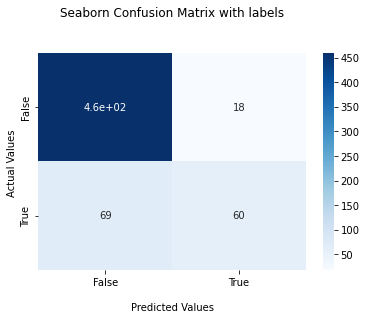

In [21]:
#print(train,test)

#confuision matrix
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test['sent_code'],pred)

print(cf_matrix)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [22]:
test['sent_accuracy'] = np.where(test['sent_code']== test['pred_sent'], 1, 0)
df2 = test.groupby('sent_code').agg({'sent_code':['count'], 
                         'sent_accuracy':['sum']}).reset_index()

df2.columns = ['_'.join(col) for col in df2.columns.values]
df2 = df2.reset_index()
df2['accuracy']=df2['sent_accuracy_sum']/df2['sent_code_count']
df2

C:\Users\kryzw\AppData\Local\Temp/ipykernel_17784/1650602817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sent_accuracy'] = np.where(test['sent_code']== test['pred_sent'], 1, 0)


,index,sent_code_,sent_code_count,sent_accuracy_sum,accuracy
0,0,0,478,460,0.962343
1,1,1,129,60,0.465116


<AxesSubplot:>

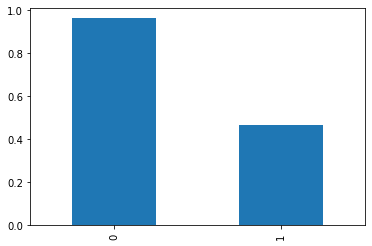

In [23]:
df2['accuracy'].plot(kind="bar")

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['lab_code'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['lab_code'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['lab_code'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    
    
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

#Fit the best model to data frame

dense_features=train_features.toarray()
dense_test= test_features.toarray()
clf = RandomForestClassifier()
fit = clf.fit(train_features,train['lab_code'])
pred = fit.predict(test_features)
accuracy = accuracy_score(pred,test['lab_code'])
print(accuracy)

test['lab_sent'] = pred
test.head(40)

test['sent_accuracy'] = np.where(test['sent_code']== test['pred_sent'], 1, 0)
test['label_accuracy'] = np.where(test['lab_code']== test['lab_sent'], 1, 0)

df3 = test.groupby('label').agg({'label':['count'], 
                         'label_accuracy':['sum']}).reset_index()

df3.columns = ['_'.join(col) for col in df3.columns.values]
df3 = df3.reset_index()
df3['accuracy']=df3['label_accuracy_sum']/df3['label_count']
df3

#df3['accuracy'].plot(x='label',kind="bar")


In [ ]:
#build a new model on twitter sentiment dataset
DATASET_ENCODING = "ISO-8859-1"
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
TRAIN_SIZE = 0.8

dft = pd.read_csv('C:/Dev_And_Apps/Twitter sentiment training dataset/archive/training.1600000.processed.noemoticon.csv', names=DATASET_COLUMNS,encoding =DATASET_ENCODING )
print(len(dft))
dft=dft.sample(frac=0.1)
print(len(dft))
# "C:/Dev_And_Apps/Twitter sentiment training dataset/archive/training.1600000.processed.noemoticon.csv"

In [ ]:
#Remove any rows with a "nan" in them
dft = dft.dropna(axis=0, how = 'any')

#Make it so that any non readable text gets converted into nothing
def removetext(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])

#Here I am doing the actual removing
dft['text'] = dft['text'].apply(removetext)

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
dft['sent_code']=le.fit_transform(df['target'])

df.head(5)

In [ ]:
#remove stop words
import re
import nltk
from nltk.corpus import stopwords

def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

#remove @monzo etc
def clean_tweet_handles(raw_tweet):
    handles_only = re.sub(r"()@\w+",r"\1",raw_tweet)
    #print(handles_only)
    words = handles_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

dft['no_handles']=dft['text'].apply(lambda x: clean_tweet_handles(x))
dft['clean_tweet']=dft['no_handles'].apply(lambda x: tweet_to_words(x))
dft['Tweet_length']=dft['text'].apply(lambda x: clean_tweet_length(x))

dft.head()

In [ ]:
dft['sent_code']=le.fit_transform(dft['target'])

In [ ]:
train,test = train_test_split(dft,test_size=0.5,random_state=42)
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)
    
test_clean_tweet[0:10]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)


In [ ]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=400),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=500),
    AdaBoostClassifier(),
    GaussianNB()]

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sent_code'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sent_code'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sent_code'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    
    
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')